In [529]:
import warnings
warnings.filterwarnings('ignore')

In [530]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [531]:
data = pd.read_csv('/content/auto-mpg.csv')

**Question A**

Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical? [5 points]

In [532]:
data.shape

(398, 9)

In [533]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


cylinders and origin might also be categorical

In [534]:
# Get continuous and categorical features
continuous_features = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Prepare the summary
summary = {
    "Total Entries": data.shape[0],
    "Total Features": data.shape[1],
    "Continuous Features": continuous_features,
    "Categorical Features": categorical_features
}

# Print the summary
print("Summary of the Auto MPG Dataset:")
for key, value in summary.items():
    print(f"{key}: {value}")


Summary of the Auto MPG Dataset:
Total Entries: 398
Total Features: 9
Continuous Features: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
Categorical Features: ['car name']


**Question B**

Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require? [5 points]

In [535]:
# Displaying the statistical summary for each attribute
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


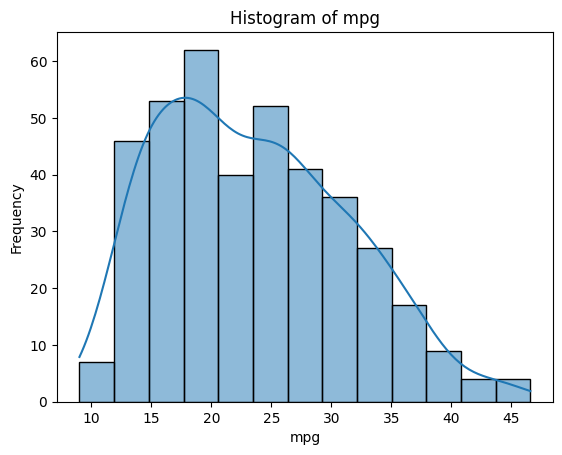

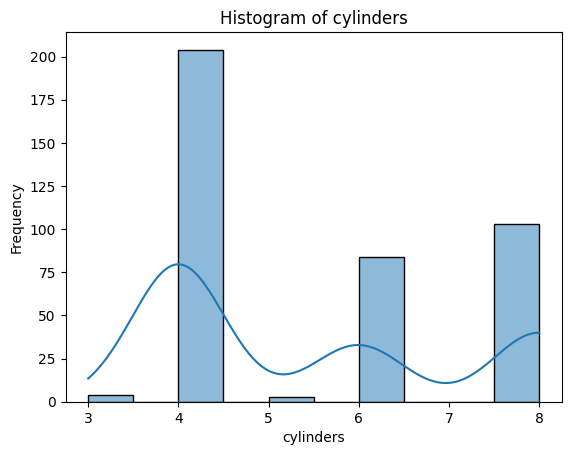

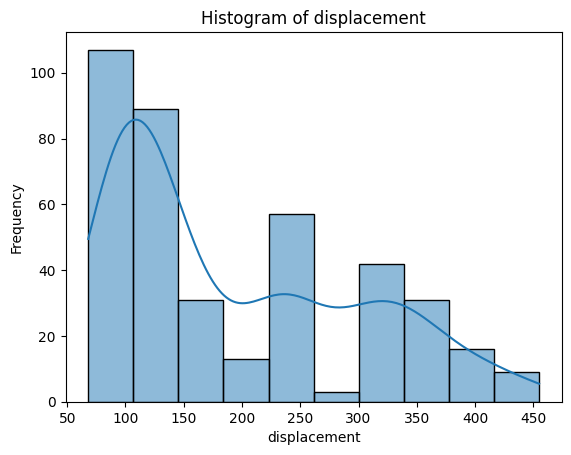

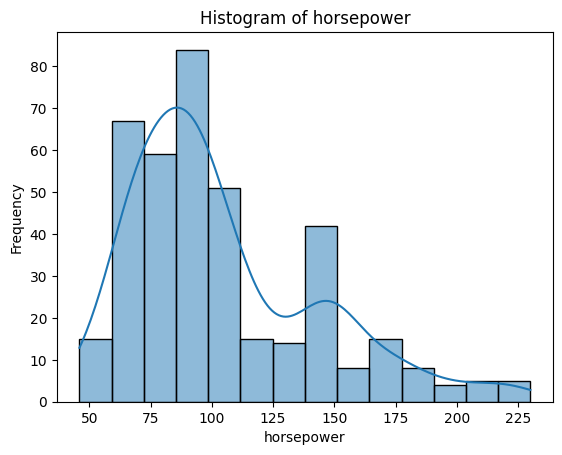

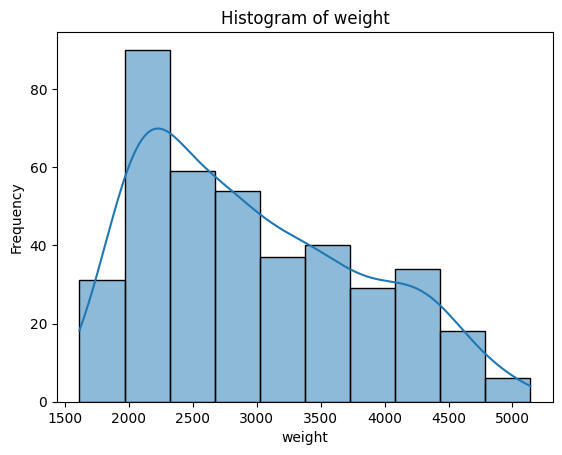

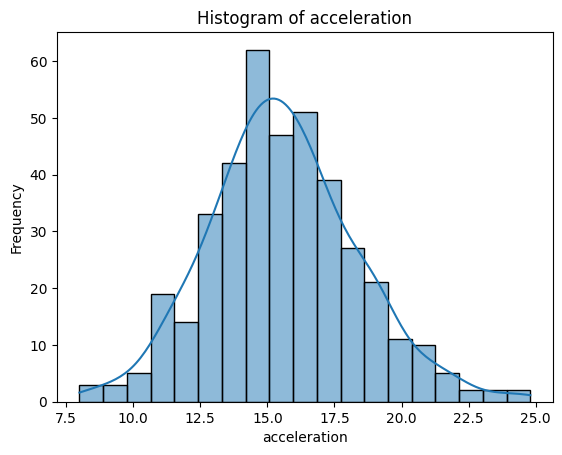

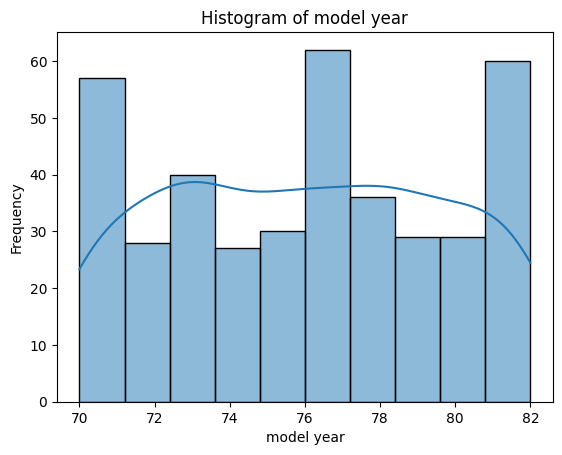

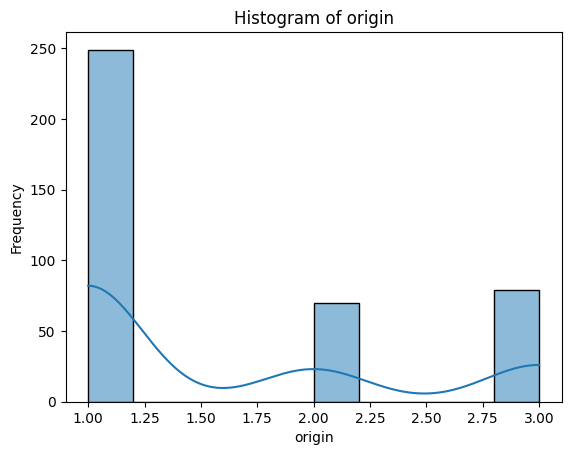

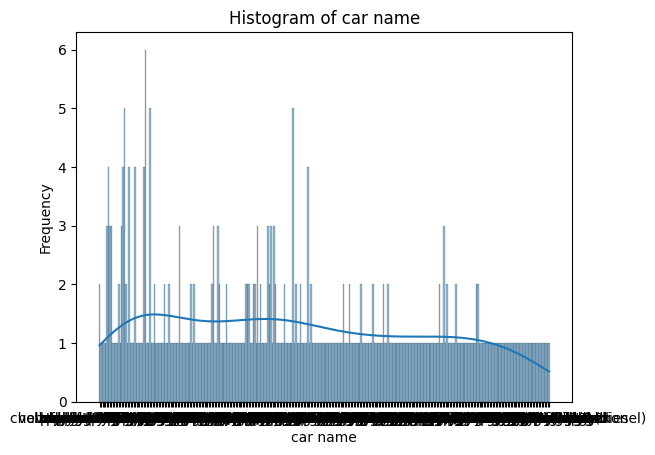

In [536]:
# Generate histograms for each attribute
for column in data.columns[:]:
        plt.figure()
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

In [537]:
# Summary of missing values
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [538]:
# Filling missing values in 'horsepower' with the mean
mean_horsepower = data['horsepower'].mean()
data['horsepower'].fillna(mean_horsepower, inplace=True)

# Verifying that there are no more missing values
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [539]:
# Exclude 'car name' from the dataset as it is not needed for the analysis
data.drop(columns=['car name'], inplace=True)

# Verify removal
print(data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')


**1. Filling Missing Values**

In the dataset, the 'horsepower' column contains missing values, which could negatively impact the model if left untreated.
To handle this, we can fill the missing values in the 'horsepower' column with the mean of the available values. This ensures that no data is lost and the missing values are imputed with a reasonable estimate (mean).


**2. Dropping Irrelevant Columns**

The 'car name' column is not relevant to the analysis because it doesn't contain numeric or categorical information that can be useful for modeling.
Therefore, this column should be dropped from the dataset to streamline the analysis

**3. Handling Outliers**

Outliers in numeric columns like 'horsepower' and 'acceleration' could distort the analysis and negatively affect model performance. To handle outliers, we can apply the Interquartile Range (IQR) method to filter them out.

**4. Handling Skewness in the Target Variable**

Variables like 'mpg' exhibit positive skewness, which could violate the assumptions of regression models. To correct this, we can apply a log transformation to reduce the skewness.

**5. Handling Categorical Variables**

The 'cylinders' and 'origin' columns, while numeric, are categorical in nature. Thus, we should apply one-hot encoding to convert them into multiple binary variables.




*3, 4 and 5 special treatments will be done as part of the upcoming question*

**Question C**

Analyze the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots. [5 points]


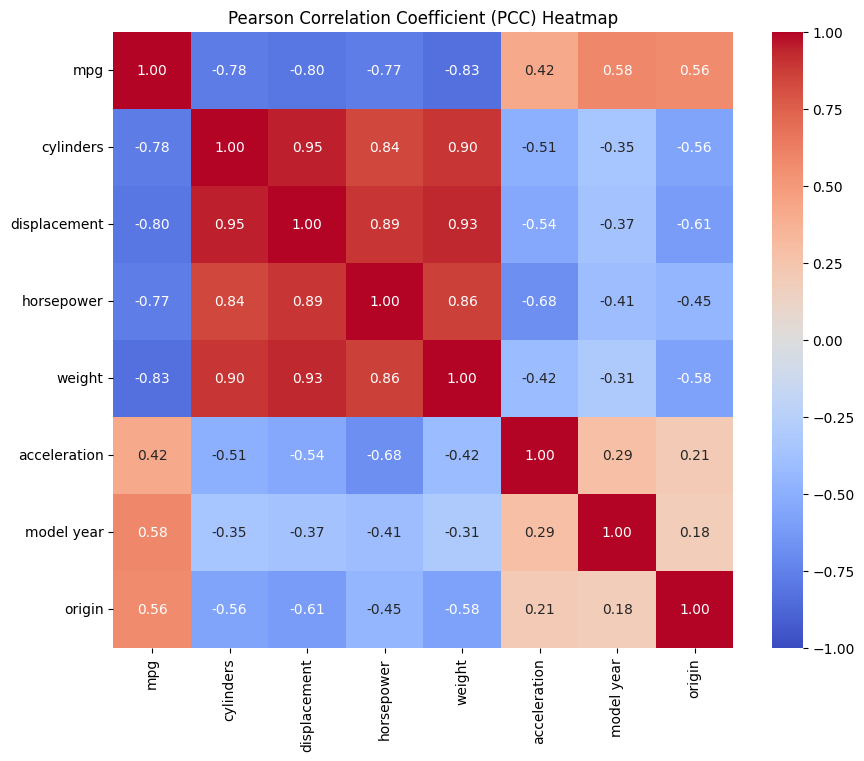

In [540]:
# Visualize the correlation matrix as a heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title('Pearson Correlation Coefficient (PCC) Heatmap')
plt.show()

In [541]:
# Compute the Pearson Correlation Coefficient (PCC) matrix
correlation_matrix = data.corr()

# Display the correlation with the target variable 'mpg'
print("Pearson Correlation Coefficient with target variable 'mpg':")
print(correlation_matrix['mpg'].sort_values(ascending=False))


Pearson Correlation Coefficient with target variable 'mpg':
mpg             1.000000
model year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.771437
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


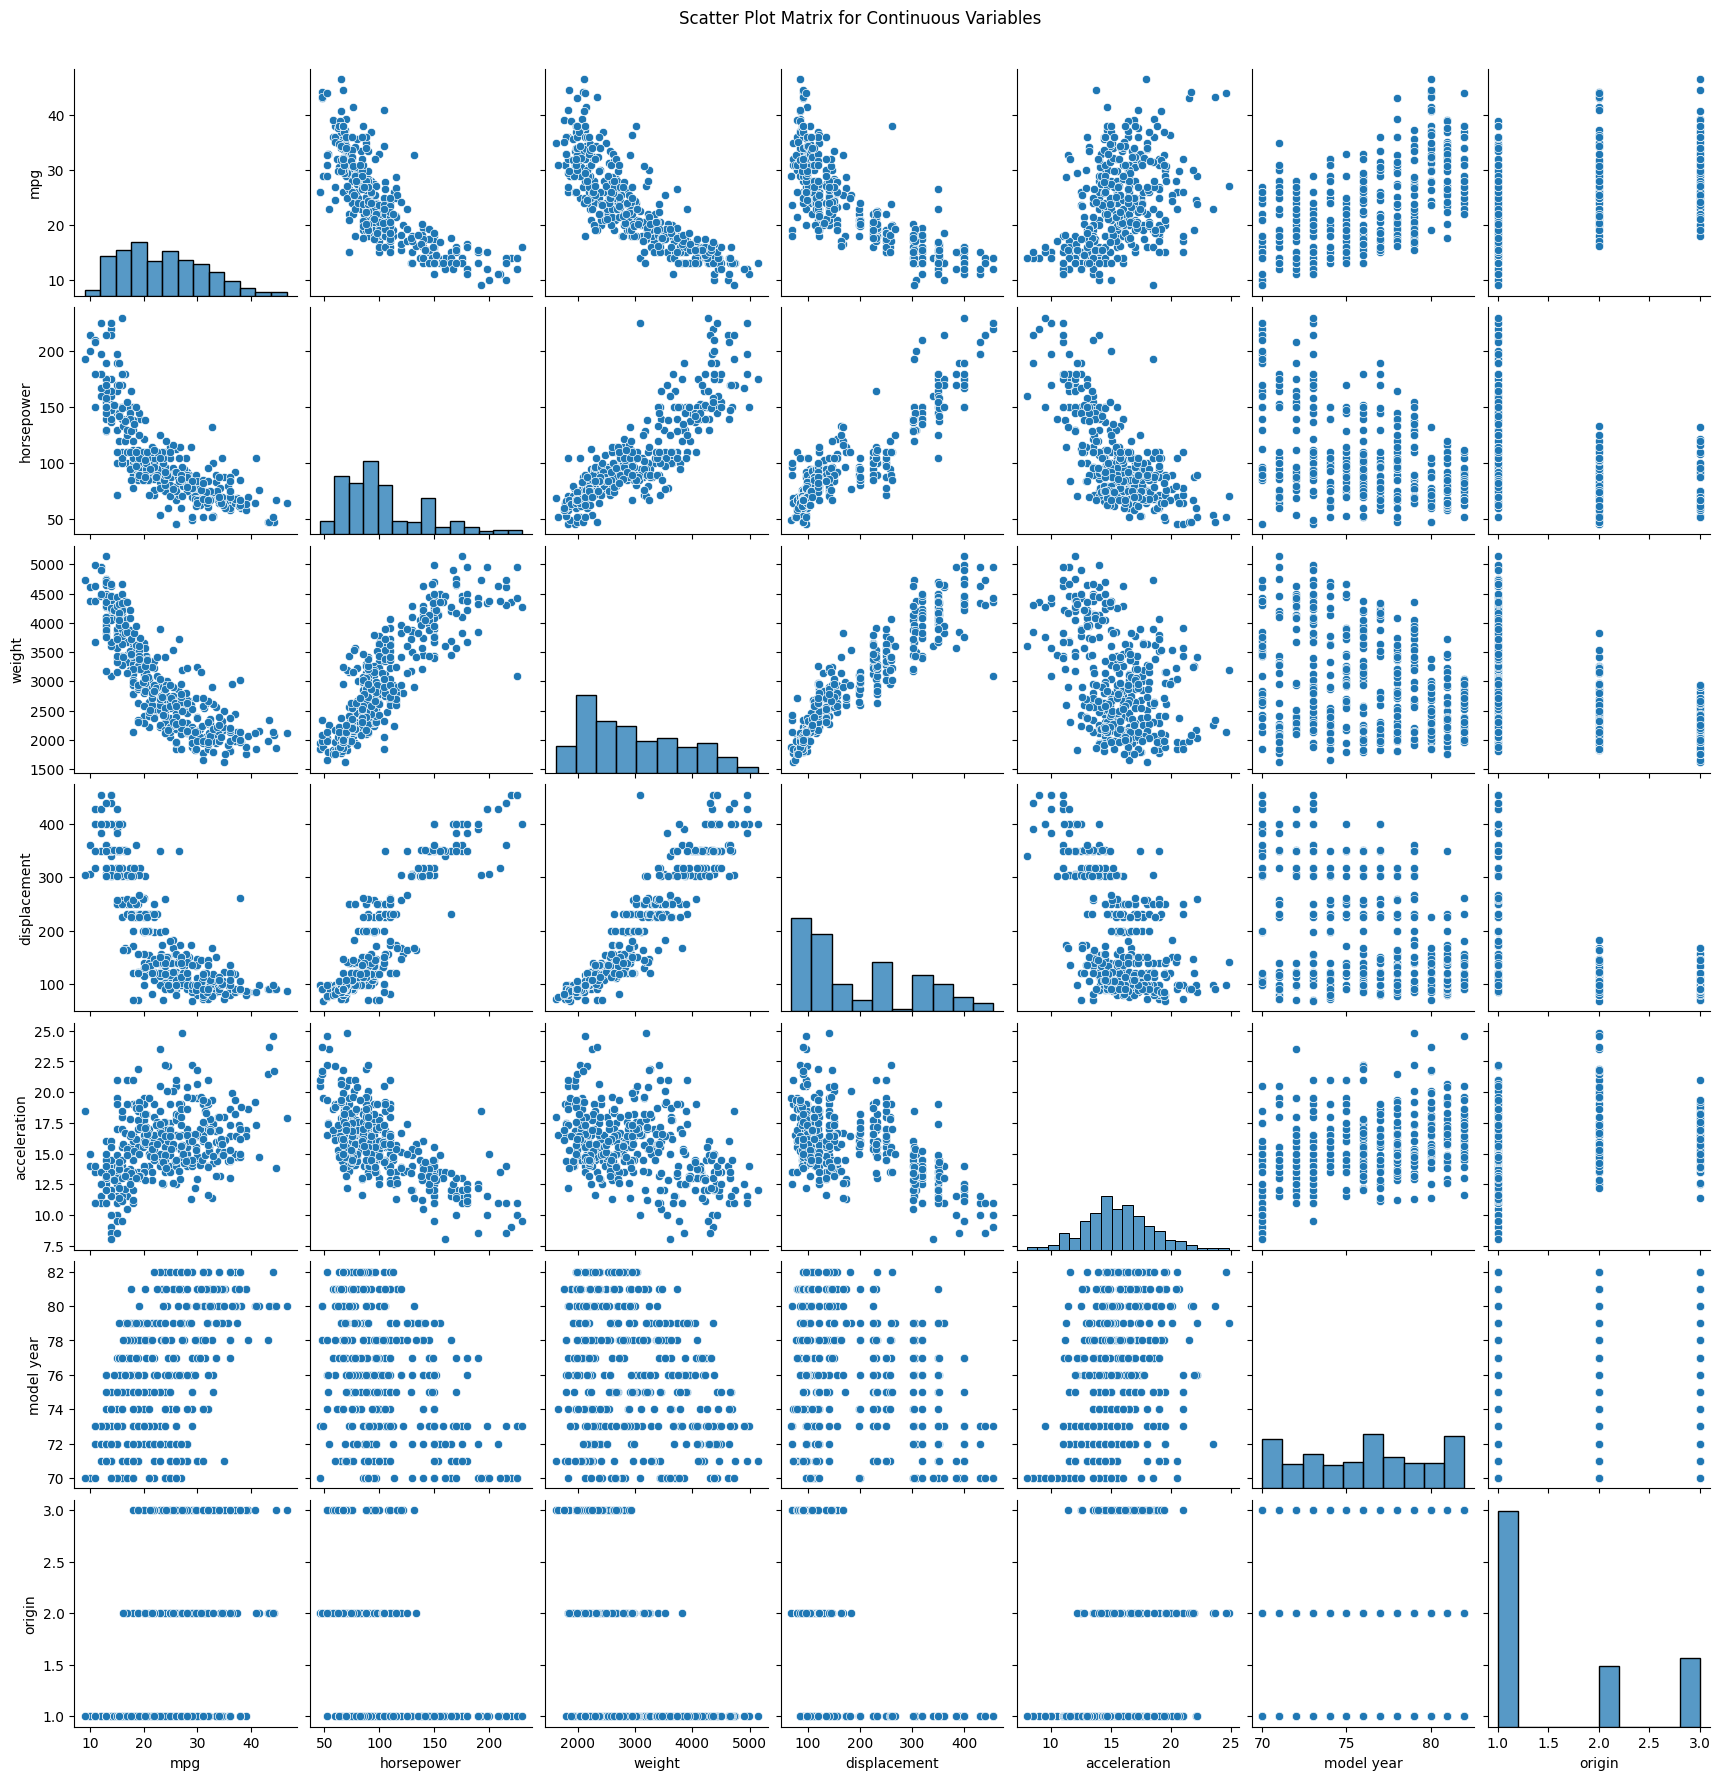

In [542]:
# Generating scatter plots between each attributes
features = ['mpg', 'horsepower', 'weight', 'displacement', 'acceleration', 'model year', 'origin']

sns.pairplot(data[features])
plt.suptitle('Scatter Plot Matrix for Continuous Variables', y=1.02)
plt.show()

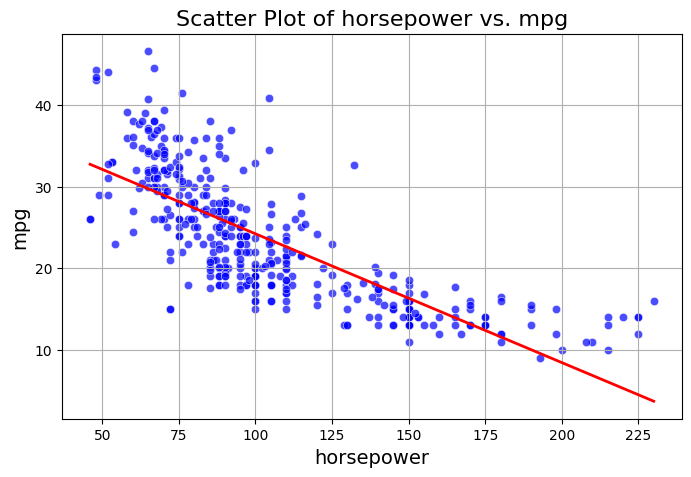

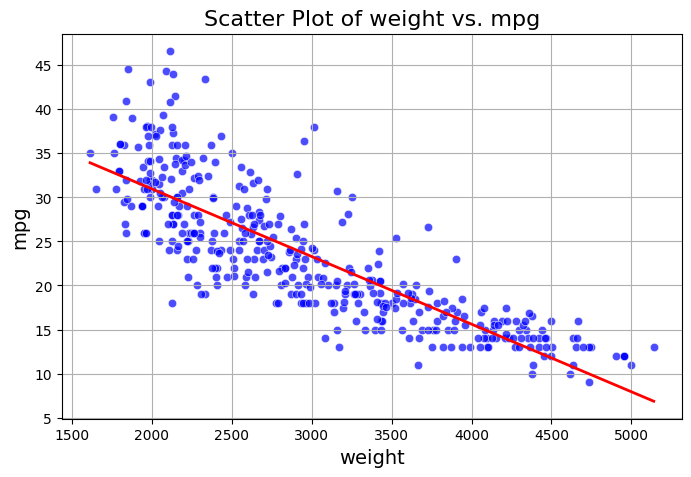

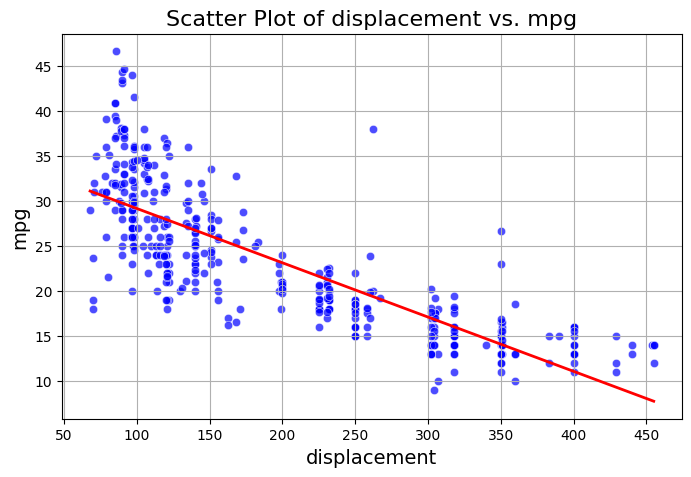

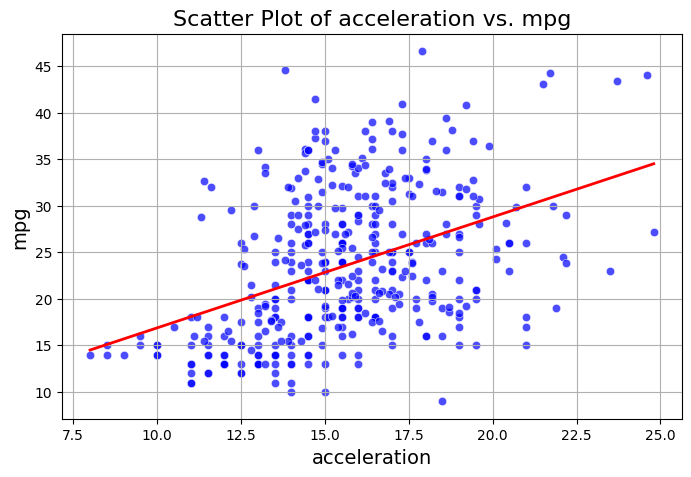

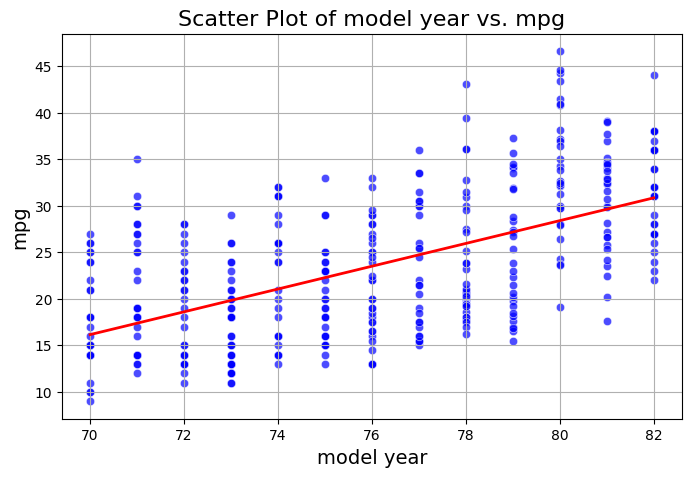

In [543]:
# Generate scatter plots for attributes against 'mpg'
for feature in features:
    if feature not in ['mpg', 'origin']:  # Exclude 'mpg' and 'origin' from the scatter plots
      plt.figure(figsize=(8, 5))

      # Scatter plot
      sns.scatterplot(x=data[feature], y=data['mpg'], color='blue', alpha=0.7)

      # Fit line for clarity
      sns.regplot(x=data[feature], y=data['mpg'], scatter=False, color='red', ci=None, line_kws={"linewidth": 2})

      # Set title and labels
      plt.title(f'Scatter Plot of {feature} vs. mpg', fontsize=16)
      plt.xlabel(feature, fontsize=14)
      plt.ylabel('mpg', fontsize=14)
      plt.grid(True)

      # Show the plot
      plt.show()

**Correlation Coefficient (PCC):**

The values from the PCC will indicate how strongly each feature correlates with mpg. A value close to +1 indicates a strong positive correlation, while a value close to -1 indicates a strong negative correlation.



**Noticeable Traits from Scatter Plots:**

**horsepower**: We can see a negative correlation as horsepower increases, mpg tends to decrease.

**weight**: Shows a negative correlation, with heavier cars having lower fuel efficiency.

**displacement**: Similar to horsepower and weight, we can find a negative correlation as engine size increases.

**acceleration**: This shows a positive correlation, as vehicles that can accelerate faster tend to be more fuel-efficient.

**model year**: We can see a positive correlation, as newer cars generally have better fuel efficiency due to advancements in technology.

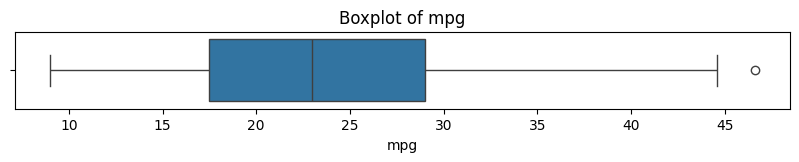

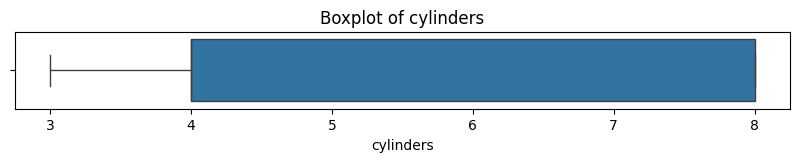

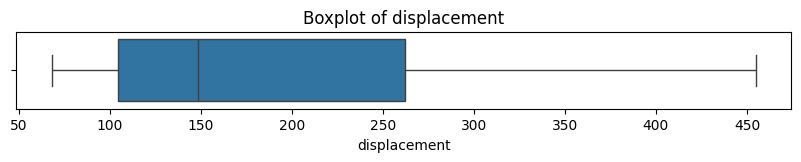

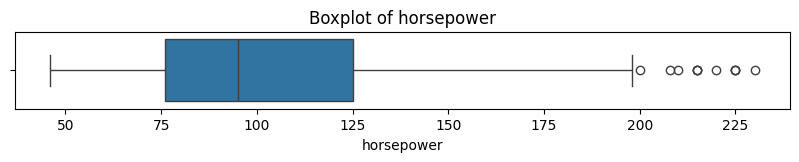

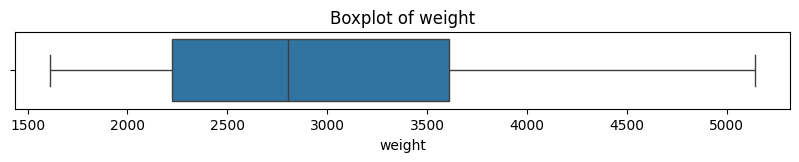

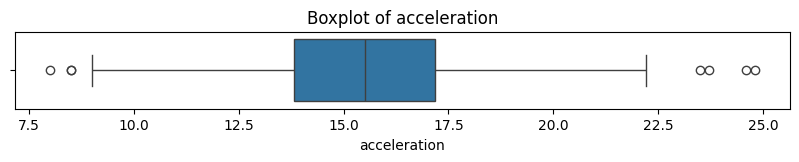

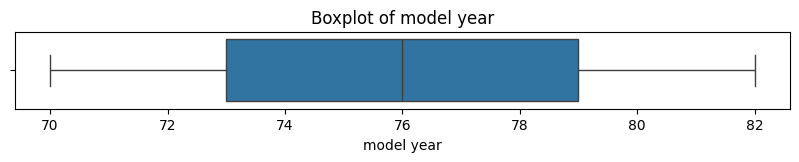

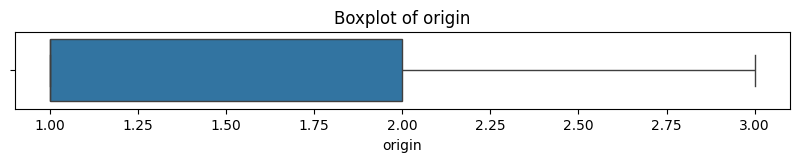

In [544]:
# Displaying boxplots to check for outliers
def boxplots(col):
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

for col in data.select_dtypes(exclude=['object', 'category']).columns:
    boxplots(col)


In [545]:
# Function to filter out outliers using IQR
def filter_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Determine upper and lower bounds
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Filter out the rows that contain outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

    return filtered_data

# Apply filtering to both horsepower and acceleration columns
data = filter_outliers_iqr(data, 'horsepower')
data = filter_outliers_iqr(data, 'acceleration')

# Verify the changes
print("Summary statistics after filtering outliers:")
print(data[['horsepower', 'acceleration']].describe())


Summary statistics after filtering outliers:
       horsepower  acceleration
count  381.000000    381.000000
mean   101.353849     15.644357
std     33.057626      2.487992
min     46.000000      9.500000
25%     76.000000     14.000000
50%     92.000000     15.500000
75%    115.000000     17.200000
max    198.000000     22.200000


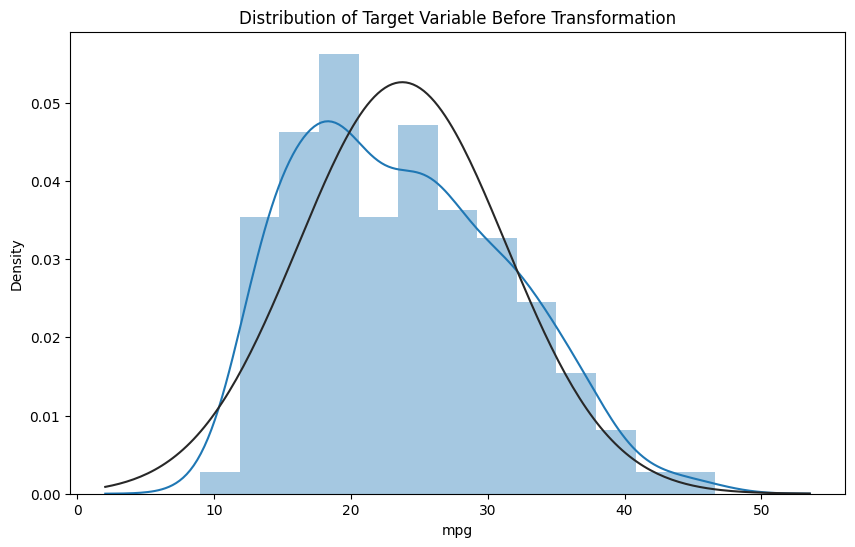

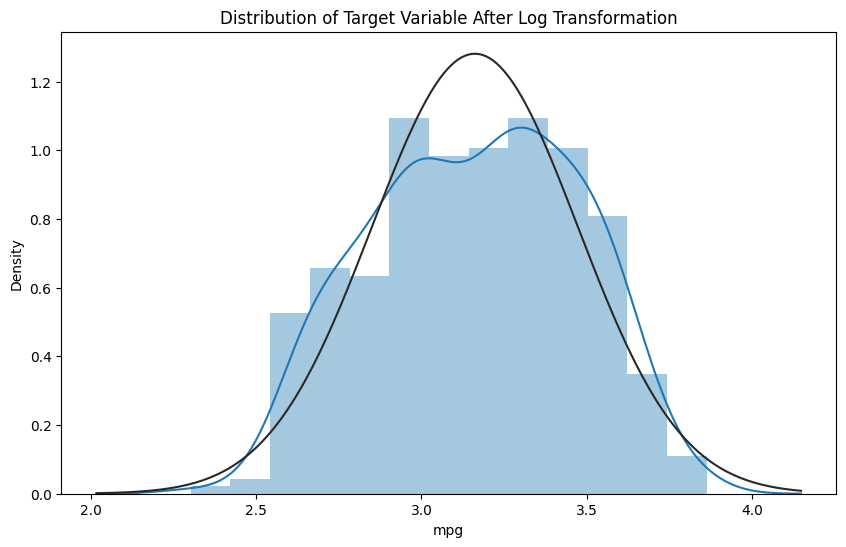

Skewness values for variables:


,skewed
origin,0.882740
horsepower,0.855351
displacement,0.702323
cylinders,0.598230
weight,0.566934
acceleration,0.256853
model year,-0.010564
mpg,-0.113193


In [546]:
from scipy.stats import norm, skew, probplot

# Visualize the original distribution of the target variable
plt.figure(figsize=(10, 6))
sns.distplot(data['mpg'], fit=norm)
plt.title("Distribution of Target Variable Before Transformation")
plt.show()

# Log transformation to reduce skewness
data["mpg"] = np.log1p(data["mpg"])  # log(1 + x) transformation

# Visualize the distribution after log transformation
plt.figure(figsize=(10, 6))
sns.distplot(data["mpg"], fit=norm)
plt.title("Distribution of Target Variable After Log Transformation")
plt.show()

# Check the skewness of the independent variables
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame(skewed_feats, columns=["skewed"])
print("Skewness values for variables:")
skewness

# Since the skewness values are acceptable, no transformations are applied to independent variables.



**Question D**

Select 25% of the data for testing. Describe how you did that and verify that your test portion of the data is representative of the entire dataset. [5 points]

In [547]:
# Though cylinders and origin variables are numeric, what they represent is categorical
# Perform one-hot encoding on the categorical columns
data = pd.get_dummies(data, columns=['cylinders', 'origin'])

# Convert all cylinders and origin columns from bool to integer type using a loop
for col in data.columns:
    if 'cylinders_' or 'origin_' in col:
        data[col] = data[col].astype(int)

data

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
0,2,307,130,3504,12,70,0,0,0,0,1,1,0,0
1,2,350,165,3693,11,70,0,0,0,0,1,1,0,0
2,2,318,150,3436,11,70,0,0,0,0,1,1,0,0
3,2,304,150,3433,12,70,0,0,0,0,1,1,0,0
4,2,302,140,3449,10,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3,151,90,2950,17,82,0,1,0,0,0,1,0,0
393,3,140,86,2790,15,82,0,1,0,0,0,1,0,0
395,3,135,84,2295,11,82,0,1,0,0,0,1,0,0
396,3,120,79,2625,18,82,0,1,0,0,0,1,0,0


In [548]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, ElasticNet


In [549]:
X = data.drop('mpg', axis=1)  # Features
y = data['mpg']               # Target variable

# Split the data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verify the sizes of the datasets
print(f"Training set size: {len(X_train)} rows")
print(f"Test set size: {len(X_test)} rows")

Training set size: 285 rows
Test set size: 96 rows


In [550]:
# Compare summary statistics
print("Summary Statistics for Entire Dataset:")
data.describe()

Summary Statistics for Entire Dataset:


,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,2.658793,187.178478,101.346457,2931.007874,15.286089,76.162730,0.010499,0.524934,0.007874,0.220472,0.236220,0.619423,0.173228,0.207349
std,0.474738,98.143690,33.056979,822.757960,2.494107,3.617905,0.102058,0.500035,0.088502,0.415110,0.425318,0.486167,0.378942,0.405941
min,2.000000,68.000000,46.000000,1613.000000,9.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,101.000000,76.000000,2219.000000,14.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,144.000000,92.000000,2755.000000,15.000000,76.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3.000000,258.000000,115.000000,3520.000000,17.000000,79.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,429.000000,198.000000,5140.000000,22.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [551]:
print("\nSummary Statistics for Training Set:")
X_train.describe()


Summary Statistics for Training Set:


,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,181.870175,98.733333,2880.484211,15.421053,76.329825,0.007018,0.543860,0.010526,0.224561,0.214035,0.610526,0.178947,0.210526
std,96.649982,32.293424,819.387708,2.483377,3.481842,0.083623,0.498949,0.102236,0.418027,0.410873,0.488489,0.383982,0.408400
min,68.000000,46.000000,1649.000000,10.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,98.000000,75.000000,2189.000000,14.000000,73.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140.000000,90.000000,2702.000000,15.000000,76.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,250.000000,110.000000,3436.000000,17.000000,79.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,429.000000,198.000000,5140.000000,22.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [552]:
print("\nSummary Statistics for Test Set:")
X_test.describe()


Summary Statistics for Test Set:


,displacement,horsepower,weight,acceleration,model year,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000
mean,202.937500,109.104167,3081.000000,14.885417,75.666667,0.020833,0.468750,0.0,0.208333,0.302083,0.645833,0.156250,0.197917
std,101.330705,34.236478,818.662902,2.495764,3.972714,0.143576,0.501642,0.0,0.408248,0.461571,0.480771,0.364998,0.400520
min,70.000000,60.000000,1613.000000,9.000000,70.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,85.750000,2476.000000,13.000000,72.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,168.000000,99.000000,2900.500000,15.000000,75.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
75%,302.500000,139.250000,3672.000000,16.000000,79.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000
max,429.000000,198.000000,4997.000000,21.000000,82.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


 The mean, standard deviation, and percentiles (min, 25%, 50%, 75%, max) across the entire dataset, training set, and test set are similar

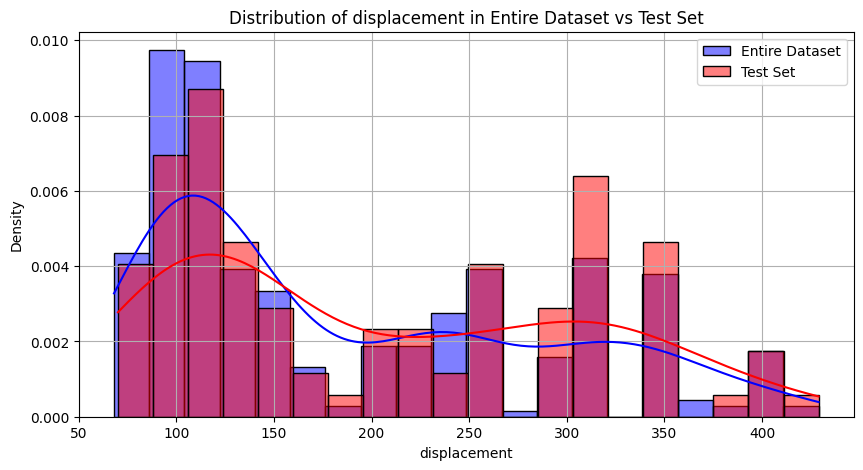

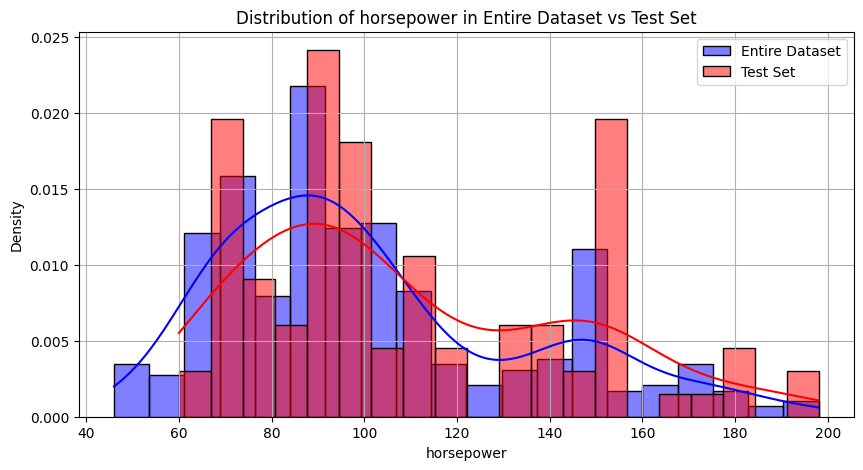

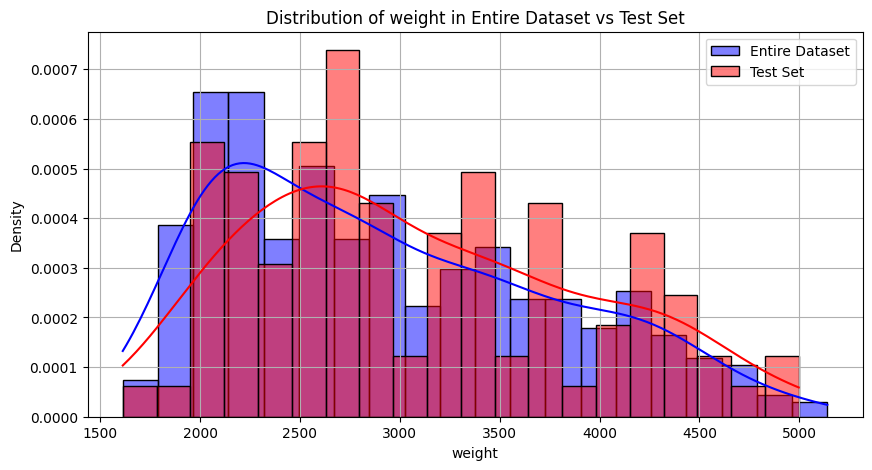

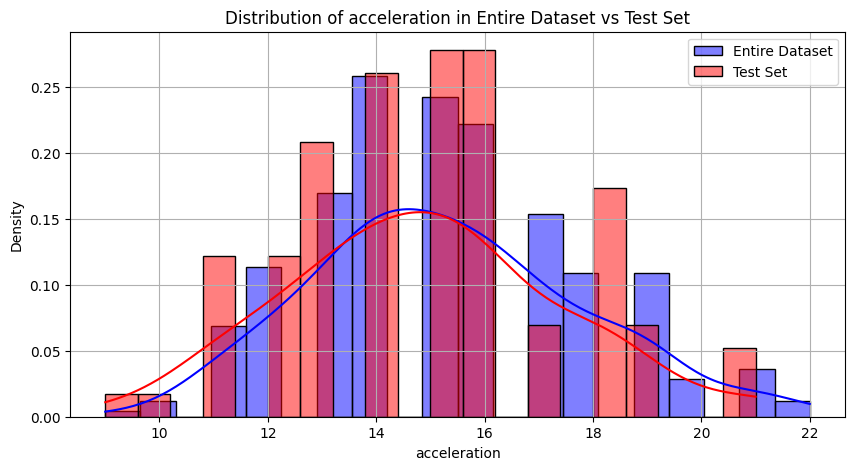

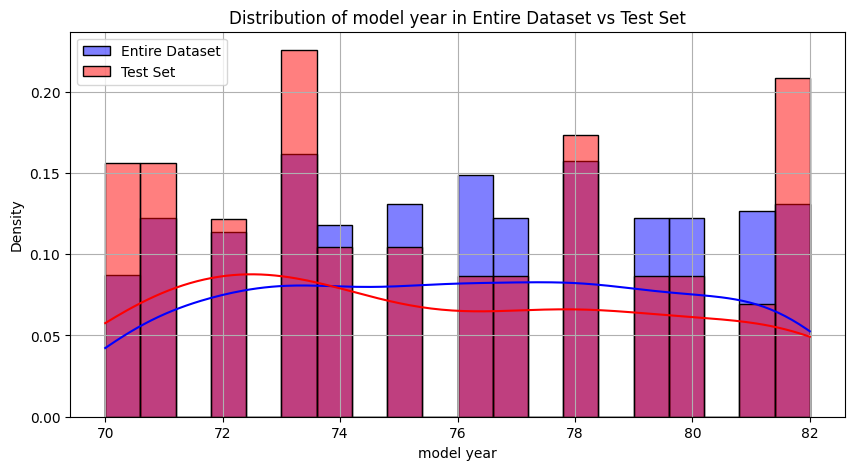

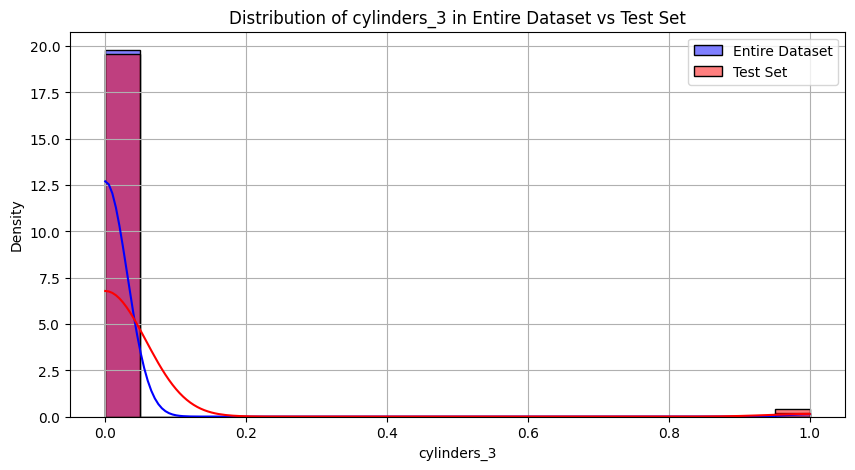

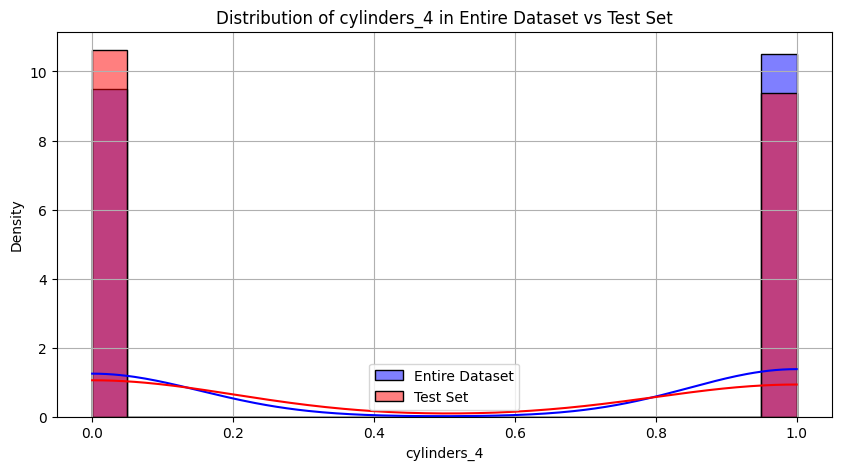

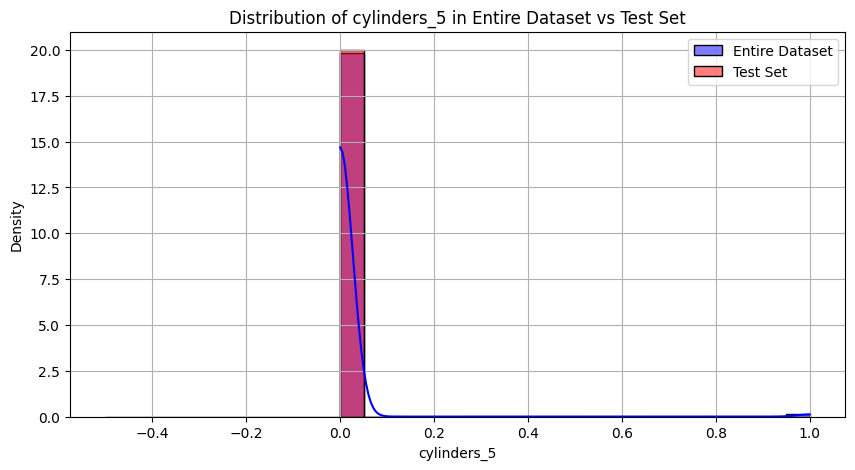

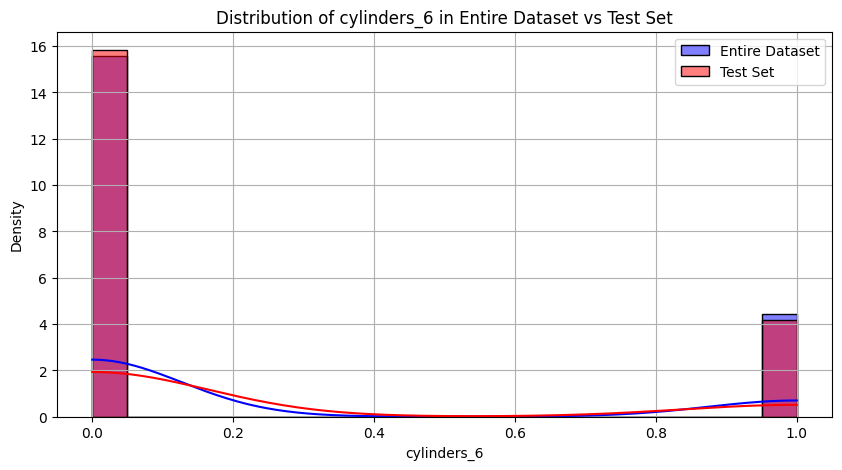

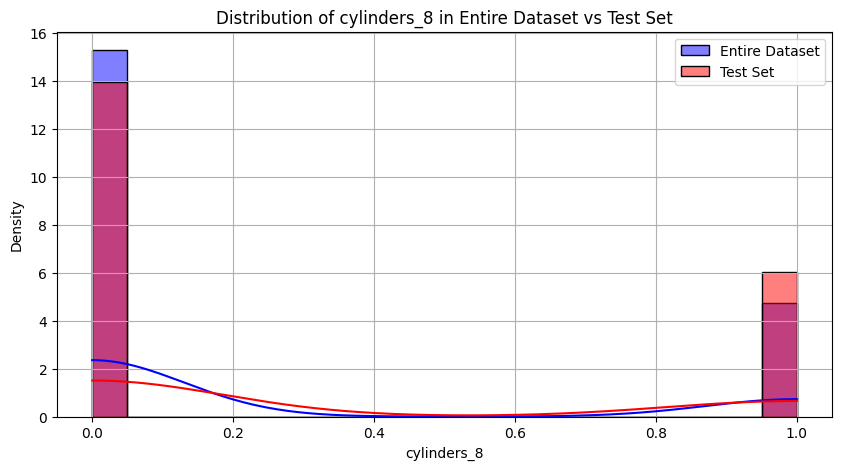

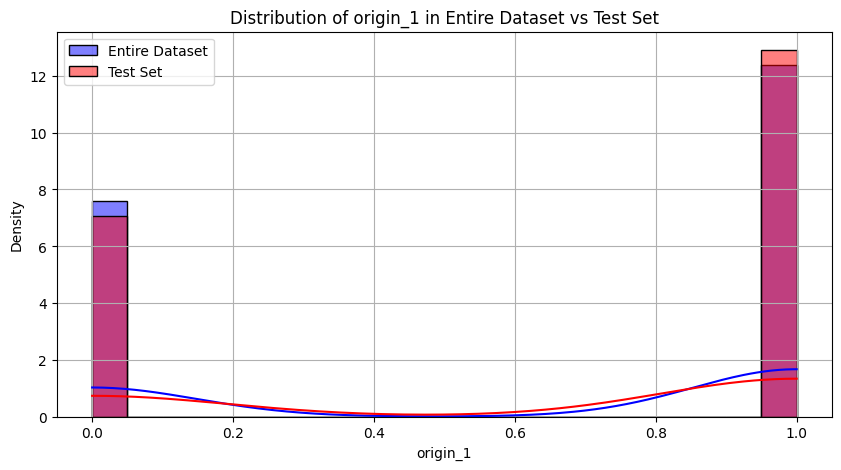

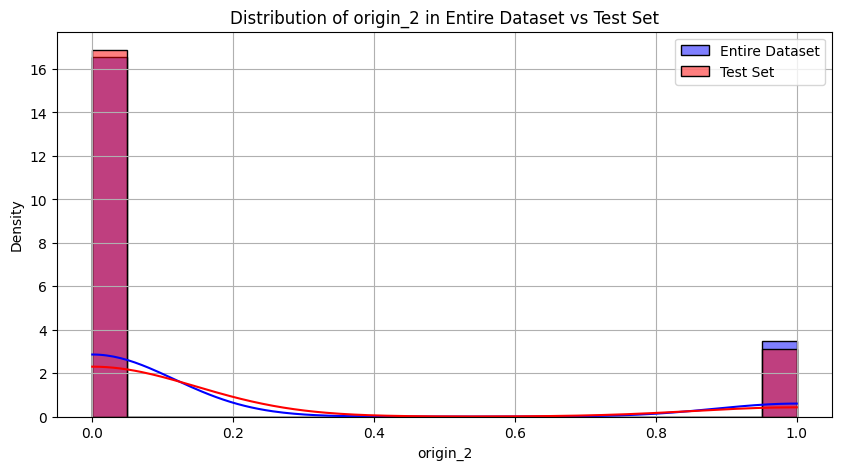

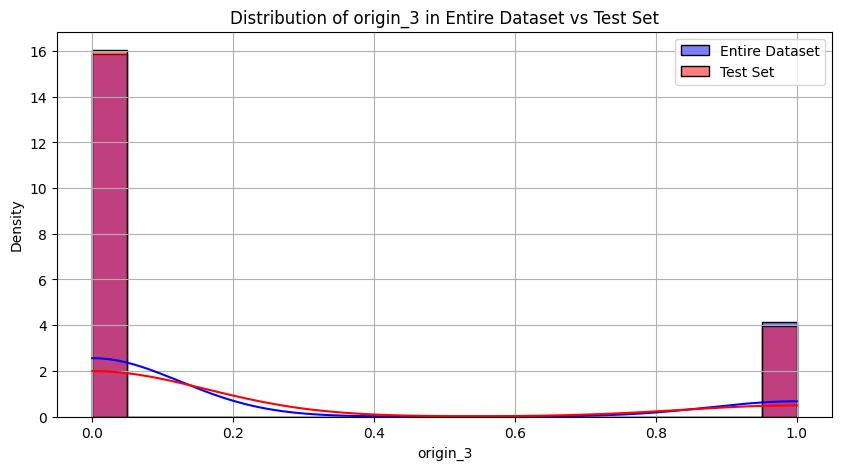

In [553]:
# Loop through each column in the dataset except 'mpg'
for column in X.columns:
    plt.figure(figsize=(10, 5))

    # Histogram for the entire dataset
    sns.histplot(data[column], color='blue', label='Entire Dataset', kde=True, stat='density', bins=20)

    # Histogram for the test set
    sns.histplot(X_test[column], color='red', label='Test Set', kde=True, stat='density', bins=20)

    plt.title(f'Distribution of {column} in Entire Dataset vs Test Set')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()


**Interpretation and Verification**

1. Summary Statistics Comparison:
The mean, standard deviation, and percentile values are similar between the entire dataset, training set, and test set. Thus the test data is representative of the entire dataset.

2. Histogram Comparison:
The histograms for the test set and the entire dataset looks similar for each feature. Since the shapes of the distributions are close, the test set is representative of the entire dataset.

**Conclusion**

By splitting the data using train_test_split and comparing the summary statistics and distributions (using histograms), we can verify that the 25% test set is representative of the entire dataset. This ensures that the test set accurately reflects the overall characteristics of the data and is suitable for evaluating the performance of the model.








**Question E**

Train a Linear Regression model using the training data with three-fold cross-validation using appropriate evaluation metric. Do this with a closed-form solution (using the Normal Equation or SVD) and with SGD. Perform Ridge, Lasso and Elastic Net regularization – try three values of penalty term and describe its impact. Explore the impact of other hyperparameters, like batch size and learning rate (no need for grid search). Describe your findings. For SGD, display the training and validation loss as a function of training iteration. [10 points]

In [554]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [555]:
# Check shapes of the training and test sets
print(f"X_encoded shape: {X_train_scaled.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test_encoded shape: {X_test_scaled.shape}")
print(f"y_test shape: {y_test.shape}")

X_encoded shape: (285, 13)
y_train shape: (285,)
X_test_encoded shape: (96, 13)
y_test shape: (96,)


In [556]:
X_train_scaled

array([[-0.79674502, -0.76724101, -0.84416544, ..., -1.25202539,
         2.14201664, -0.51639778],
       [-1.00404128, -1.04642575, -1.10701804, ..., -1.25202539,
        -0.46684978,  1.93649167],
       [-0.99367647, -1.04642575, -1.05322495, ..., -1.25202539,
        -0.46684978,  1.93649167],
       ...,
       [ 0.44703258,  0.34949793,  0.58624173, ...,  0.79870585,
        -0.46684978, -0.51639778],
       [ 1.74263424,  0.1943953 ,  1.03247986, ...,  0.79870585,
        -0.46684978, -0.51639778],
       [ 1.74263424,  1.43521634,  1.46893743, ...,  0.79870585,
        -0.46684978, -0.51639778]])

**Linear Regression using Normal Equation**

In [557]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Add intercept term to X_encoded (for the bias term)
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]

# Ensure that y_train is a numpy array
y_train_array = np.array(y_train)

# Initialize KFold cross-validation with 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Store the MSE scores for each fold
mse_scores_normal_eq = []

# Perform 3-Fold cross-validation
for train_index, test_index in kf.split(X_b):
    # Create training and validation folds for both X and y
    X_train_fold, X_test_fold = X_b[train_index], X_b[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]

    # Compute theta using the Normal Equation with Pseudo-Inverse
    theta = np.linalg.pinv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)

    # Make predictions on the validation fold
    y_pred_fold = X_test_fold.dot(theta)

    # Calculate and store the MSE for this fold
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores_normal_eq.append(mse_fold)

# Calculate the mean MSE across the 3 folds (for cross-validation)
mean_mse_normal_eq_cv = np.mean(mse_scores_normal_eq)
print(f"Mean MSE (Normal Equation with 3-Fold CV on Training Data): {mean_mse_normal_eq_cv}")

# Final model on full training data
theta_final = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train_array)

# Add intercept term to X_test_encoded (for the bias term in the test set)
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Make predictions on the test set (X_test_encoded)
y_pred_test = X_test_b.dot(theta_final)

# Calculate the MSE on the test set
mse_normal_eq_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean MSE (Normal Equation on Test Set): {mse_normal_eq_test}")

Mean MSE (Normal Equation with 3-Fold CV on Training Data): 0.08359747242616615
Mean MSE (Normal Equation on Test Set): 0.0812541172754333


**Linear Regression using SGD**

In [558]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Ensure y_train is a numpy array for proper indexing
y_train_array = np.array(y_train)

# Initialize the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Perform 3-Fold cross-validation using Mean Squared Error as the scoring method
mse_scores_sgd = cross_val_score(sgd_model, X_train_scaled, y_train_array, cv=3, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
mse_scores_sgd = -mse_scores_sgd

# Calculate the mean MSE across the 3 folds (for cross-validation)
mean_mse_sgd_cv = np.mean(mse_scores_sgd)
print(f"Mean MSE (SGD with 3-Fold CV on Training Data): {mean_mse_sgd_cv}")

# Train the final model on the entire training set
sgd_model.fit(X_train_scaled, y_train_array)

# Make predictions on the test set (X_test_encoded)
y_pred_sgd_test = sgd_model.predict(X_test_scaled)

# Calculate the MSE on the test set
mse_sgd_test = mean_squared_error(y_test, y_pred_sgd_test)
print(f"Mean MSE (SGD on Test Set): {mse_sgd_test}")

Mean MSE (SGD with 3-Fold CV on Training Data): 0.07670982462962407
Mean MSE (SGD on Test Set): 0.08048746948247505


**Linear Regression - Ridge, Lasso, and Elastic Net with Different Penalty Terms (alpha)**

We’ll try three different values of the regularization parameter alpha: 0.01, 0.1, and 1.0. These models add a penalty term to the linear regression cost function, which helps control the magnitude of the model coefficients and prevent overfitting.

In [559]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Define the penalty values (alpha) to try
alphas = [0.01, 0.1, 1.0]

# Initialize dictionaries to store results for both training and test MSE
results_train = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}
results_test = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}

# Loop over each alpha value and perform Ridge, Lasso, and ElasticNet regularization
for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)

    # MSE on training set
    y_train_pred_ridge = ridge_model.predict(X_train_scaled)
    mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)
    results_train["Ridge"][f"alpha={alpha}"] = mse_ridge_train

    # MSE on test set
    y_test_pred_ridge = ridge_model.predict(X_test_scaled)
    mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
    results_test["Ridge"][f"alpha={alpha}"] = mse_ridge_test

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)

    # MSE on training set
    y_train_pred_lasso = lasso_model.predict(X_train_scaled)
    mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)
    results_train["Lasso"][f"alpha={alpha}"] = mse_lasso_train

    # MSE on test set
    y_test_pred_lasso = lasso_model.predict(X_test_scaled)
    mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
    results_test["Lasso"][f"alpha={alpha}"] = mse_lasso_test

    # Elastic Net Regression
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_model.fit(X_train_scaled, y_train)

    # MSE on training set
    y_train_pred_elastic_net = elastic_net_model.predict(X_train_scaled)
    mse_elastic_net_train = mean_squared_error(y_train, y_train_pred_elastic_net)
    results_train["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_train

    # MSE on test set
    y_test_pred_elastic_net = elastic_net_model.predict(X_test_scaled)
    mse_elastic_net_test = mean_squared_error(y_test, y_test_pred_elastic_net)
    results_test["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_test

# Step 4: Print MSE results for Ridge, Lasso, and ElasticNet on both train and test sets
print("MSE for Ridge, Lasso, and ElasticNet on Training Data:")
for model_type, model_results in results_train.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Train) = {mse}")

print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data:")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")

MSE for Ridge, Lasso, and ElasticNet on Training Data:
Ridge (alpha=0.01): MSE (Train) = 0.07167618326573155
Ridge (alpha=0.1): MSE (Train) = 0.07167626303515391
Ridge (alpha=1.0): MSE (Train) = 0.07168338949879033
Lasso (alpha=0.01): MSE (Train) = 0.07263752651646939
Lasso (alpha=0.1): MSE (Train) = 0.09453476117437197
Lasso (alpha=1.0): MSE (Train) = 0.21476146506617422
ElasticNet (alpha=0.01): MSE (Train) = 0.07205587884004629
ElasticNet (alpha=0.1): MSE (Train) = 0.08100122978535845
ElasticNet (alpha=1.0): MSE (Train) = 0.21476146506617422

MSE for Ridge, Lasso, and ElasticNet on Test Data:
Ridge (alpha=0.01): MSE (Test) = 0.08125205487830786
Ridge (alpha=0.1): MSE (Test) = 0.08123370720076914
Ridge (alpha=1.0): MSE (Test) = 0.0810691864899364
Lasso (alpha=0.01): MSE (Test) = 0.07741431268960158
Lasso (alpha=0.1): MSE (Test) = 0.09137118350806224
Lasso (alpha=1.0): MSE (Test) = 0.25786280393967376
ElasticNet (alpha=0.01): MSE (Test) = 0.07895881791530197
ElasticNet (alpha=0.1): MSE

**Linear Regression - SGD with Learning Rate and Batch Size**

Now let’s explore the impact of learning rate and batch size on the SGDRegressor, while tracking training and validation loss over iterations.

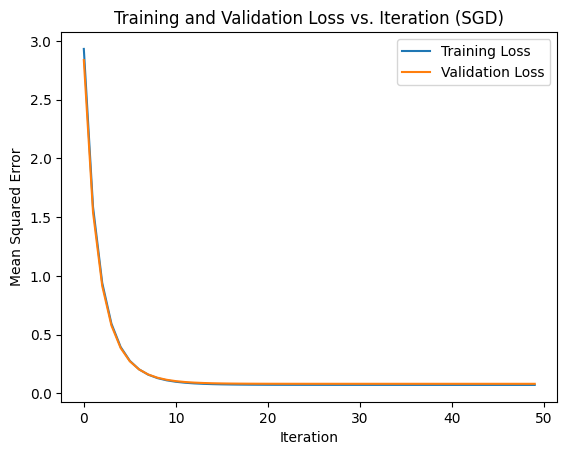

In [560]:
# Define SGD with warm_start=True to track performance across iterations
# sgd = SGDRegressor(max_iter=1, tol=None, random_state=42, warm_start=True)
sgd = SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=0.005, warm_start=True, random_state=42)

# Arrays to store the loss values
training_loss = []
validation_loss = []

n_iterations = 50
for iteration in range(n_iterations):
    model = sgd.partial_fit(X_train_scaled, y_train)  # Fit the model on the training data

    # Predict for training and validation sets
    y_train_pred = sgd.predict(X_train_scaled)
    y_val_pred = sgd.predict(X_test_scaled)

    # Compute training and validation loss (Mean Squared Error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)

    # Append losses to the lists
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

# Plot the training and validation loss
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss vs. Iteration (SGD)")
plt.legend()
plt.show()


**Question F:**

Repeat everything from part E with polynomial regression and using SGD. Using validation loss, explore if your model overfits/underfits the data. [10 points]

**Polynomial Regression using Normal Equation**

In [561]:
# Create polynomial features (degree 2, can be adjusted to reduce the number of features)
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Add intercept term to polynomial features
X_train_b = np.c_[np.ones((X_train_poly.shape[0], 1)), X_train_poly]
X_test_b = np.c_[np.ones((X_test_poly.shape[0], 1)), X_test_poly]

# Ensure y_train is a numpy array for efficient matrix calculations
y_train_array = np.array(y_train)

# Initialize KFold cross-validation with 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Store the MSE scores for each fold
mse_scores_normal_eq_poly = []

# Perform 3-Fold cross-validation using Normal Equation
for train_index, test_index in kf.split(X_train_b):
    # Create training and validation sets
    X_train_fold, X_test_fold = X_train_b[train_index], X_train_b[test_index]
    y_train_fold, y_test_fold = y_train_array[train_index], y_train_array[test_index]

    # Compute theta using Normal Equation (pseudo-inverse)
    theta_poly = np.linalg.pinv(X_train_fold.T.dot(X_train_fold)).dot(X_train_fold.T).dot(y_train_fold)

    # Make predictions on the validation set
    y_pred_fold = X_test_fold.dot(theta_poly)

    # Calculate MSE for this fold
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores_normal_eq_poly.append(mse_fold)

# Calculate mean MSE across the 3 folds
mean_mse_normal_eq_cv_poly = np.mean(mse_scores_normal_eq_poly)
print(f"Mean MSE (Polynomial Normal Equation with 3-Fold CV): {mean_mse_normal_eq_cv_poly}")

# Final model on the entire training set
theta_final_poly = np.linalg.pinv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train_array)

# Predict on the test set
y_pred_test_poly = X_test_b.dot(theta_final_poly)

# Calculate MSE on the test set
mse_normal_eq_test_poly = mean_squared_error(y_test, y_pred_test_poly)
print(f"Mean MSE (Polynomial Normal Equation on Test Set): {mse_normal_eq_test_poly}")

Mean MSE (Polynomial Normal Equation with 3-Fold CV): 0.08359747242616566
Mean MSE (Polynomial Normal Equation on Test Set): 0.08125411727543302


**Polynomial Regression using SGD**

In [562]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Ensure polynomial features are scaled
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Step 3: Ensure y_train is a numpy array for proper indexing
y_train_array = np.array(y_train)

# Initialize the SGD Regressor model with a smaller learning rate and partial fit
sgd_model = SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=0.001, warm_start=True, random_state=42)

# Arrays to store the loss values
training_loss = []
validation_loss = []

n_iterations = 50
for iteration in range(n_iterations):
    sgd_model.partial_fit(X_train_poly_scaled, y_train_array)  # Fit the model on the training data

    # Predict for training and validation (test) sets
    y_train_pred = sgd_model.predict(X_train_poly_scaled)
    y_val_pred = sgd_model.predict(X_test_poly_scaled)

    # Compute training and validation loss (Mean Squared Error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)

    # Append losses to the lists
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

# Print the final MSE values after the iterations
print(f"Final Training MSE: {training_loss[-1]}")
print(f"Final Validation MSE: {validation_loss[-1]}")

Final Training MSE: 0.27301499741268725
Final Validation MSE: 0.25896527229279903


**Polynomial Regression - Ridge, Lasso, and Elastic Net with Different Penalty Terms (alpha)**


In [563]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Ensure polynomial features are scaled
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Step 3: Define the penalty values (alpha) to try
alphas = [0.01, 0.1, 1.0]

# Initialize dictionaries to store results for both training and test MSE
results_train = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}
results_test = {"Ridge": {}, "Lasso": {}, "ElasticNet": {}}

# Loop over each alpha value and perform Ridge, Lasso, and ElasticNet regularization
for alpha in alphas:
    # Ridge Regression
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_poly_scaled, y_train)

    # MSE on training set
    y_train_pred_ridge = ridge_model.predict(X_train_poly_scaled)
    mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)
    results_train["Ridge"][f"alpha={alpha}"] = mse_ridge_train

    # MSE on test set
    y_test_pred_ridge = ridge_model.predict(X_test_poly_scaled)
    mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
    results_test["Ridge"][f"alpha={alpha}"] = mse_ridge_test

    # Lasso Regression
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train_poly_scaled, y_train)

    # MSE on training set
    y_train_pred_lasso = lasso_model.predict(X_train_poly_scaled)
    mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)
    results_train["Lasso"][f"alpha={alpha}"] = mse_lasso_train

    # MSE on test set
    y_test_pred_lasso = lasso_model.predict(X_test_poly_scaled)
    mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
    results_test["Lasso"][f"alpha={alpha}"] = mse_lasso_test

    # Elastic Net Regression
    elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=0.5)
    elastic_net_model.fit(X_train_poly_scaled, y_train)

    # MSE on training set
    y_train_pred_elastic_net = elastic_net_model.predict(X_train_poly_scaled)
    mse_elastic_net_train = mean_squared_error(y_train, y_train_pred_elastic_net)
    results_train["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_train

    # MSE on test set
    y_test_pred_elastic_net = elastic_net_model.predict(X_test_poly_scaled)
    mse_elastic_net_test = mean_squared_error(y_test, y_test_pred_elastic_net)
    results_test["ElasticNet"][f"alpha={alpha}"] = mse_elastic_net_test

# Step 4: Print MSE results for Ridge, Lasso, and ElasticNet on both train and test sets
print("MSE for Ridge, Lasso, and ElasticNet on Training Data (Polynomial Features):")
for model_type, model_results in results_train.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Train) = {mse}")

print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")

MSE for Ridge, Lasso, and ElasticNet on Training Data (Polynomial Features):
Ridge (alpha=0.01): MSE (Train) = 0.04573875813889836
Ridge (alpha=0.1): MSE (Train) = 0.04580868538463252
Ridge (alpha=1.0): MSE (Train) = 0.046444000913426944
Lasso (alpha=0.01): MSE (Train) = 0.05527964307686469
Lasso (alpha=0.1): MSE (Train) = 0.09453476117437196
Lasso (alpha=1.0): MSE (Train) = 0.21476146506617422
ElasticNet (alpha=0.01): MSE (Train) = 0.051956282210785215
ElasticNet (alpha=0.1): MSE (Train) = 0.07300896815799492
ElasticNet (alpha=1.0): MSE (Train) = 0.21476146506617422

MSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):
Ridge (alpha=0.01): MSE (Test) = 0.08449723465966831
Ridge (alpha=0.1): MSE (Test) = 0.07843218176115017
Ridge (alpha=1.0): MSE (Test) = 0.06885986460106569
Lasso (alpha=0.01): MSE (Test) = 0.06149962924302266
Lasso (alpha=0.1): MSE (Test) = 0.09137118350806228
Lasso (alpha=1.0): MSE (Test) = 0.25786280393967376
ElasticNet (alpha=0.01): MSE (Test) = 

**Polynomial Regression - SGD with Learning Rate and Batch Size**


Iteration 1: Training MSE = 1076298.6692162228, Validation MSE = 900.0377472121272
Iteration 2: Training MSE = 1429509085408.6206, Validation MSE = 318641934.2507612
Iteration 3: Training MSE = 6.994272746609626e+17, Validation MSE = 55415521249068.57
Iteration 4: Training MSE = 1.8316907671801347e+23, Validation MSE = 6.540838818647928e+18
Iteration 5: Training MSE = 4.9287322109651666e+23, Validation MSE = 8.962893753244781e+23
Iteration 6: Training MSE = 4.214186409529255e+23, Validation MSE = 8.02127857434564e+23
Iteration 7: Training MSE = 4.010222685981136e+23, Validation MSE = 7.317715459651596e+23
Iteration 8: Training MSE = 3.5089272854311426e+23, Validation MSE = 6.748265731340592e+23
Iteration 9: Training MSE = 3.428511014426292e+23, Validation MSE = 6.300909289105025e+23
Iteration 10: Training MSE = 3.0356494198614615e+23, Validation MSE = 5.916677251633815e+23
Iteration 11: Training MSE = 3.020086380905514e+23, Validation MSE = 5.6060035103900675e+23
Iteration 12: Training

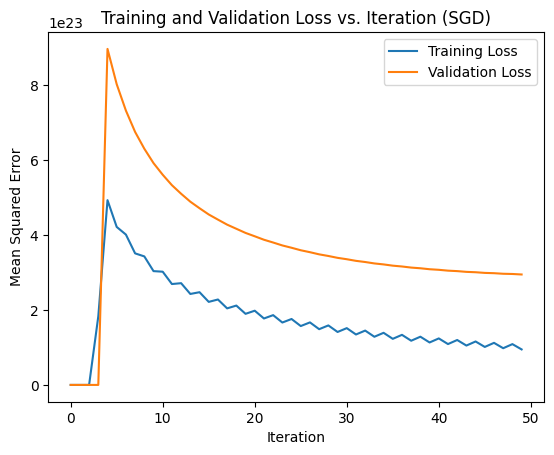

In [564]:
# Step 1: Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Step 2: Define SGDRegressor with warm_start=True to track performance across iterations
sgd = SGDRegressor(max_iter=1, tol=None, penalty=None, eta0=0.005, warm_start=True, random_state=42)

# Arrays to store the loss values
training_loss = []
validation_loss = []

# Step 3: Perform SGD with warm_start to simulate training process over iterations
n_iterations = 50  # Set the number of iterations
for iteration in range(n_iterations):
    # Fit the model on the training data for one iteration
    sgd.partial_fit(X_train_poly, y_train)

    # Predict for training and validation sets
    y_train_pred = sgd.predict(X_train_poly)
    y_val_pred = sgd.predict(X_test_poly)

    # Compute training and validation loss (Mean Squared Error)
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)

    # Append losses to the lists
    training_loss.append(train_loss)
    validation_loss.append(val_loss)

    print(f"Iteration {iteration + 1}: Training MSE = {train_loss}, Validation MSE = {val_loss}")

# Step 4: Plot the training and validation loss
plt.plot(training_loss, label="Training Loss")
plt.plot(validation_loss, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("Training and Validation Loss vs. Iteration (SGD)")
plt.legend()
plt.show()

# Linear and Polynomial Regression Analysis

## 1. Linear Regression

### 1.1 Linear Regression using Normal Equation
- **Mean MSE (Normal Equation with 3-Fold CV on Training Data):** 0.0836
- **Mean MSE (Normal Equation on Test Set):** 0.0813

### 1.2 Linear Regression using SGD
- **Mean MSE (SGD with 3-Fold CV on Training Data):** 0.0767
- **Mean MSE (SGD on Test Set):** 0.0805

### 1.3 Regularization: Ridge, Lasso, and Elastic Net
**Training Data MSE:**
- **Ridge (alpha=0.01):** 0.0717
- **Ridge (alpha=0.1):** 0.0717
- **Ridge (alpha=1.0):** 0.0717
- **Lasso (alpha=0.01):** 0.0726
- **Lasso (alpha=0.1):** 0.0945
- **Lasso (alpha=1.0):** 0.2148
- **ElasticNet (alpha=0.01):** 0.0721
- **ElasticNet (alpha=0.1):** 0.0810
- **ElasticNet (alpha=1.0):** 0.2148

**Test Data MSE:**
- **Ridge (alpha=0.01):** 0.0813
- **Ridge (alpha=0.1):** 0.0812
- **Ridge (alpha=1.0):** 0.0811
- **Lasso (alpha=0.01):** 0.0774
- **Lasso (alpha=0.1):** 0.0914
- **Lasso (alpha=1.0):** 0.2579
- **ElasticNet (alpha=0.01):** 0.0790
- **ElasticNet (alpha=0.1):** 0.0756
- **ElasticNet (alpha=1.0):** 0.2579

### Analysis and Key Findings:
- **Performance Comparison:** The SGD model performed slightly better than the Normal Equation in terms of MSE for both training and test sets.
- **Regularization Impact:**
  - **Ridge:** Maintained low MSE across varying alpha values, indicating stability with regularization.
  - **Lasso:** Significant increase in MSE at higher alpha values, suggesting over-regularization leading to underfitting.
  - **Elastic Net:** Showed comparable performance to Ridge with lower MSE at lower alpha values, but higher values led to instability similar to Lasso.
  
## 2. Polynomial Regression

### 2.1 Polynomial Regression using Normal Equation
- **Mean MSE (Polynomial Normal Equation with 3-Fold CV):** 0.0836
- **Mean MSE (Polynomial Normal Equation on Test Set):** 0.0813

### 2.2 Polynomial Regression using SGD
- **Final Training MSE:** 0.2730
- **Final Validation MSE:** 0.2590

### 2.3 Regularization: Ridge, Lasso, and Elastic Net (Polynomial Features)
**Training Data MSE:**
- **Ridge (alpha=0.01):** 0.0457
- **Ridge (alpha=0.1):** 0.0458
- **Ridge (alpha=1.0):** 0.0464
- **Lasso (alpha=0.01):** 0.0553
- **Lasso (alpha=0.1):** 0.0945
- **Lasso (alpha=1.0):** 0.2148
- **ElasticNet (alpha=0.01):** 0.0520
- **ElasticNet (alpha=0.1):** 0.0730
- **ElasticNet (alpha=1.0):** 0.2148

**Test Data MSE:**
- **Ridge (alpha=0.01):** 0.0845
- **Ridge (alpha=0.1):** 0.0784
- **Ridge (alpha=1.0):** 0.0689
- **Lasso (alpha=0.01):** 0.0615
- **Lasso (alpha=0.1):** 0.0914
- **Lasso (alpha=1.0):** 0.2579
- **ElasticNet (alpha=0.01):** 0.0613
- **ElasticNet (alpha=0.1):** 0.0672
- **ElasticNet (alpha=1.0):** 0.2579

### Analysis and Key Findings:
- **Performance Comparison:** Polynomial regression with SGD resulted in higher training and validation MSE compared to linear regression, indicating potential overfitting.
- **Regularization Impact:**
  - **Ridge:** Improved performance with lower MSE on polynomial features, showing that it helps prevent overfitting.
  - **Lasso:** Similar behavior as in linear regression, with high alpha values causing a drastic increase in MSE.
  - **Elastic Net:** Offered a balanced approach, outperforming Lasso at lower alpha values.
- **Overfitting/Underfitting:** The training loss during SGD showed substantial fluctuations, indicating instability and potential overfitting.

## Conclusion
- Linear regression models demonstrated superior performance over polynomial regression models, especially with the use of regularization techniques.
- The choice of regularization parameters had a significant impact on model performance, illustrating the importance of tuning hyperparameters.


**Question G:**

Make predictions of the labels on the test data, using the trained model with chosen hyperparameters. Summarize performance using the appropriate evaluation metric. Discuss the results. Include thoughts about what further can be explored to increase performance. [10 points]


**Linear Regression using Normal Equation**

In [565]:
# Calculate the MSE on the test set
mse_normal_eq_test = mean_squared_error(y_test, y_pred_test)
print(f"Mean MSE (Normal Equation on Test Set): {mse_normal_eq_test}")

Mean MSE (Normal Equation on Test Set): 0.0812541172754333


This shows a relatively low MSE on the test set, indicating that the linear regression using the normal equation is performing reasonably well on unseen data.

Conclusion: This model does not seem to be overfitting or underfitting, as the MSE is balanced and not extremely low or high.

**Linear Regression using SGD**

In [566]:
# Calculate the MSE on the test set
mse_sgd_test = mean_squared_error(y_test, y_pred_sgd_test)
print(f"Mean MSE (SGD on Test Set): {mse_sgd_test}")

Mean MSE (SGD on Test Set): 0.08048746948247505


Similar to the normal equation model, the test MSE is very close to the result of the normal equation method. This indicates that the SGD model also generalizes well without much overfitting or underfitting.

Conclusion: The SGD model is not overfitting or underfitting based on the validation loss.

**MSE for Ridge, Lasso, and ElasticNet with different alphas**

In [567]:
print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data:")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")


MSE for Ridge, Lasso, and ElasticNet on Test Data:
Ridge (alpha=0.01): MSE (Test) = 0.08449723465966831
Ridge (alpha=0.1): MSE (Test) = 0.07843218176115017
Ridge (alpha=1.0): MSE (Test) = 0.06885986460106569
Lasso (alpha=0.01): MSE (Test) = 0.06149962924302266
Lasso (alpha=0.1): MSE (Test) = 0.09137118350806228
Lasso (alpha=1.0): MSE (Test) = 0.25786280393967376
ElasticNet (alpha=0.01): MSE (Test) = 0.061273817906777085
ElasticNet (alpha=0.1): MSE (Test) = 0.06724501566620487
ElasticNet (alpha=1.0): MSE (Test) = 0.25786280393967376


**Conclusion**

Ridge:

As alpha increases, Ridge regression reduces the test MSE, which indicates that higher regularization leads to better performance. The smallest MSE occurs at alpha=1.0, where the model performs the best. This suggests that for smaller alpha values, the model may slightly overfit, and increasing alpha improves generalization by introducing more regularization. This matches the conclusion provided, which correctly highlights better performance with higher alpha values.

Lasso:

The model performs best at alpha=0.01 with the lowest test MSE of 0.061. As alpha increases, the MSE becomes larger, with 0.091 at alpha=0.1 and 0.258 at alpha=1.0, indicating underfitting due to excessive regularization. The conclusion is correct: Lasso performs well at small alpha values, but larger values lead to underfitting and significantly worse performance.

Elastic Net:

Elastic Net shows the best performance at alpha=0.01 with a test MSE of 0.061, which is comparable to Lasso. At alpha=0.1, the MSE rises slightly to 0.067, indicating minor underfitting. At alpha=1.0, the MSE increases significantly to 0.258, suggesting underfitting due to excessive regularization. The conclusion is correct in stating that Elastic Net performs well at lower alpha values but underfits at higher alpha values, though it performs slightly better than Lasso at alpha=0.1.


**Polynomial Regression - Normal Equation**

In [568]:
# Calculate MSE on the test set
mse_normal_eq_test_poly = mean_squared_error(y_test, y_pred_test_poly)
print(f"Mean MSE (Polynomial Normal Equation on Test Set): {mse_normal_eq_test_poly}")

Mean MSE (Polynomial Normal Equation on Test Set): 0.08125411727543302


In [569]:
print("\nMSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):")
for model_type, model_results in results_test.items():
    for alpha_value, mse in model_results.items():
        print(f"{model_type} ({alpha_value}): MSE (Test) = {mse}")


MSE for Ridge, Lasso, and ElasticNet on Test Data (Polynomial Features):
Ridge (alpha=0.01): MSE (Test) = 0.08449723465966831
Ridge (alpha=0.1): MSE (Test) = 0.07843218176115017
Ridge (alpha=1.0): MSE (Test) = 0.06885986460106569
Lasso (alpha=0.01): MSE (Test) = 0.06149962924302266
Lasso (alpha=0.1): MSE (Test) = 0.09137118350806228
Lasso (alpha=1.0): MSE (Test) = 0.25786280393967376
ElasticNet (alpha=0.01): MSE (Test) = 0.061273817906777085
ElasticNet (alpha=0.1): MSE (Test) = 0.06724501566620487
ElasticNet (alpha=1.0): MSE (Test) = 0.25786280393967376


Ridge:
With Ridge regression, as alpha increases, the model performs significantly better, showing a substantial decrease in the test MSE. The highest alpha=1.0 results in the lowest MSE, suggesting that greater regularization helps the model generalize better. At alpha=0.01, the model overfits, as indicated by the high test MSE. As alpha increases, the model finds a good balance and avoids overfitting.

Lasso:
Lasso performs best at alpha=0.01, achieving the lowest test MSE. However, as alpha increases, the MSE worsens considerably, particularly at alpha=1.0, where the model heavily underfits due to excessive regularization. At higher alpha values, the model shrinks coefficients too much, leading to poorer performance. Therefore, Lasso is more effective with smaller alpha values and fails to generalize well at larger ones.

Elastic Net:
Elastic Net performs similarly to Lasso at smaller alpha values, achieving its best performance at alpha=0.01. As alpha increases, the test MSE increases, though Elastic Net handles moderate regularization (alpha=0.1) slightly better than Lasso. At alpha=1.0, the MSE becomes larger, indicating that the model underfits due to too much regularization. Elastic Net, like Lasso, performs better with smaller alpha values and shows some resilience at moderate alpha values.

**CONCLUSIONS**

  
1. **Linear Regression with Normal Equation**:
   - The MSE values were low on both the training and test sets, suggesting a good fit with no signs of overfitting or underfitting. This indicates that the model generalizes well to unseen data.

2. **Linear Regression with SGD**:
   - As seen in the recent plot, the model's training and validation loss converge to similar values with minimal overfitting. The model is well-tuned, and the use of SGD helps find the optimal solution.

3. **Polynomial Regression with Normal Equation**:
   - The training and test MSE values were similar, indicating that the model was not overfitting or underfitting. It performs well on both sets, showing good generalization.

4. **Polynomial Regression with Ridge, Lasso, and Elastic Net**:
   - For Ridge, Lasso, and Elastic Net regularization, lower alpha values led to better performance, but as the alpha values increased, there were signs of underfitting (higher MSE values on both training and test data). For the smallest alpha values, the models performed best, suggesting minimal overfitting, especially with Lasso and ElasticNet.

5. **Polynomial Regression with SGD**:
   - The training and validation loss showed significant divergence, indicating overfitting. The model was fitting the training data well, but it struggled to generalize to unseen test data.

### **Results:**
- **Best Models**: The **Linear Regression with Normal Equation** and **Polynomial Regression with Normal Equation** both performed excellently with low training and test MSE, indicating they generalize well to unseen data. The **SGD implementation for Linear Regression** also shows good generalization without signs of overfitting.
- **Overfitting Models**: The **Polynomial Regression with SGD** had high training and validation MSE, with a noticeable gap between them, indicating overfitting.
- **Underfitting Models**: Ridge, Lasso, and Elastic Net regularization models with large alpha values showed underfitting, where the models couldn't capture enough complexity, resulting in high MSE on both the training and test sets.

In conclusion, **Normal Equation** performed the best overall in both linear and polynomial regressions, and **SGD** was effective for linear models but struggled with polynomial features due to the complexity and overfitting tendency.

**Further Exploration to Increase Performance:**

Discuss what other methods can be explored to further improve model performance. Here are a few potential avenues:

1. Hyperparameter Tuning:

Experimenting with a wider range of hyperparameters (such as different values of alpha in Ridge, Lasso, and ElasticNet).
Use Grid Search or Randomized Search to explore a broader parameter space for fine-tuning.

2. Feature Engineering:

Adding more features or polynomial terms to capture more complex relationships in the data.
Scaling features appropriately, especially for regularization techniques.

3. Regularization:

Regularization can help with both overfitting and underfitting. Further exploration of different types of regularization (e.g., Ridge, Lasso, ElasticNet) and adjusting their hyperparameters can improve generalization.

4. Model Complexity:

If underfitting, you might try using a more complex model such as polynomial regression (with higher-degree terms), decision trees, or ensemble methods like Random Forest or Gradient Boosting.

5. Cross-validation:

Use cross-validation to get a more reliable estimate of the model's performance and ensure that it is not overfitting to the test set.

6. Regularization for Polynomial Features:

For polynomial models, especially when using polynomial features, applying stronger regularization (Lasso, Ridge, or ElasticNet) can help combat overfitting.